In [1]:
# plot a subplots geospatial data with lon & lat accumulation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

C:\Users\Administrator\.conda\envs\ox\lib\site-packages\pyproj\__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()
C:\Users\Administrator\.conda\envs\ox\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_23000\1229821173.py:5: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next r

In [20]:
# create a geodataframe
gdf = gpd.GeoDataFrame(
    pd.DataFrame({
        'lat': np.random.uniform(-90, 90, 10000),
        'lon': np.random.uniform(-180, 180, 10000),
        'value': np.random.uniform(0, 100, 10000)
    }),
    geometry=gpd.points_from_xy(np.random.uniform(-180, 180, 10000), np.random.uniform(-90, 90, 10000))
)

In [21]:
# group by lon & lat
gdf['lon'] = gdf['lon'].round(0)
gdf['lat'] = gdf['lat'].round(0)
gdf.head()

,lat,lon,value,geometry
0,-78.0,-60.0,52.038179,POINT (26.10821 48.79272)
1,-18.0,-139.0,56.780350,POINT (-82.50657 -62.23004)
2,71.0,-113.0,89.658722,POINT (-173.03424 -4.01051)
3,66.0,88.0,61.534318,POINT (100.06107 -88.32773)
4,69.0,-17.0,19.219302,POINT (-19.94448 13.74021)


In [22]:
# group by lon or lat
gdf_grouped_lon = gdf.groupby('lon').agg({'value': 'sum'}).reset_index()
gdf_grouped_lat = gdf.groupby('lat').agg({'value': 'sum'}).reset_index()

In [23]:
gdf_grouped_lon.head()

,lon,value
0,-180.0,968.944182
1,-179.0,1428.103143
2,-178.0,1392.547153
3,-177.0,1479.151919
4,-176.0,1825.336813


In [24]:
gdf_grouped_lat.head()

,lat,value
0,-90.0,962.219255
1,-89.0,3044.389862
2,-88.0,3908.878037
3,-87.0,2405.375644
4,-86.0,2636.748138


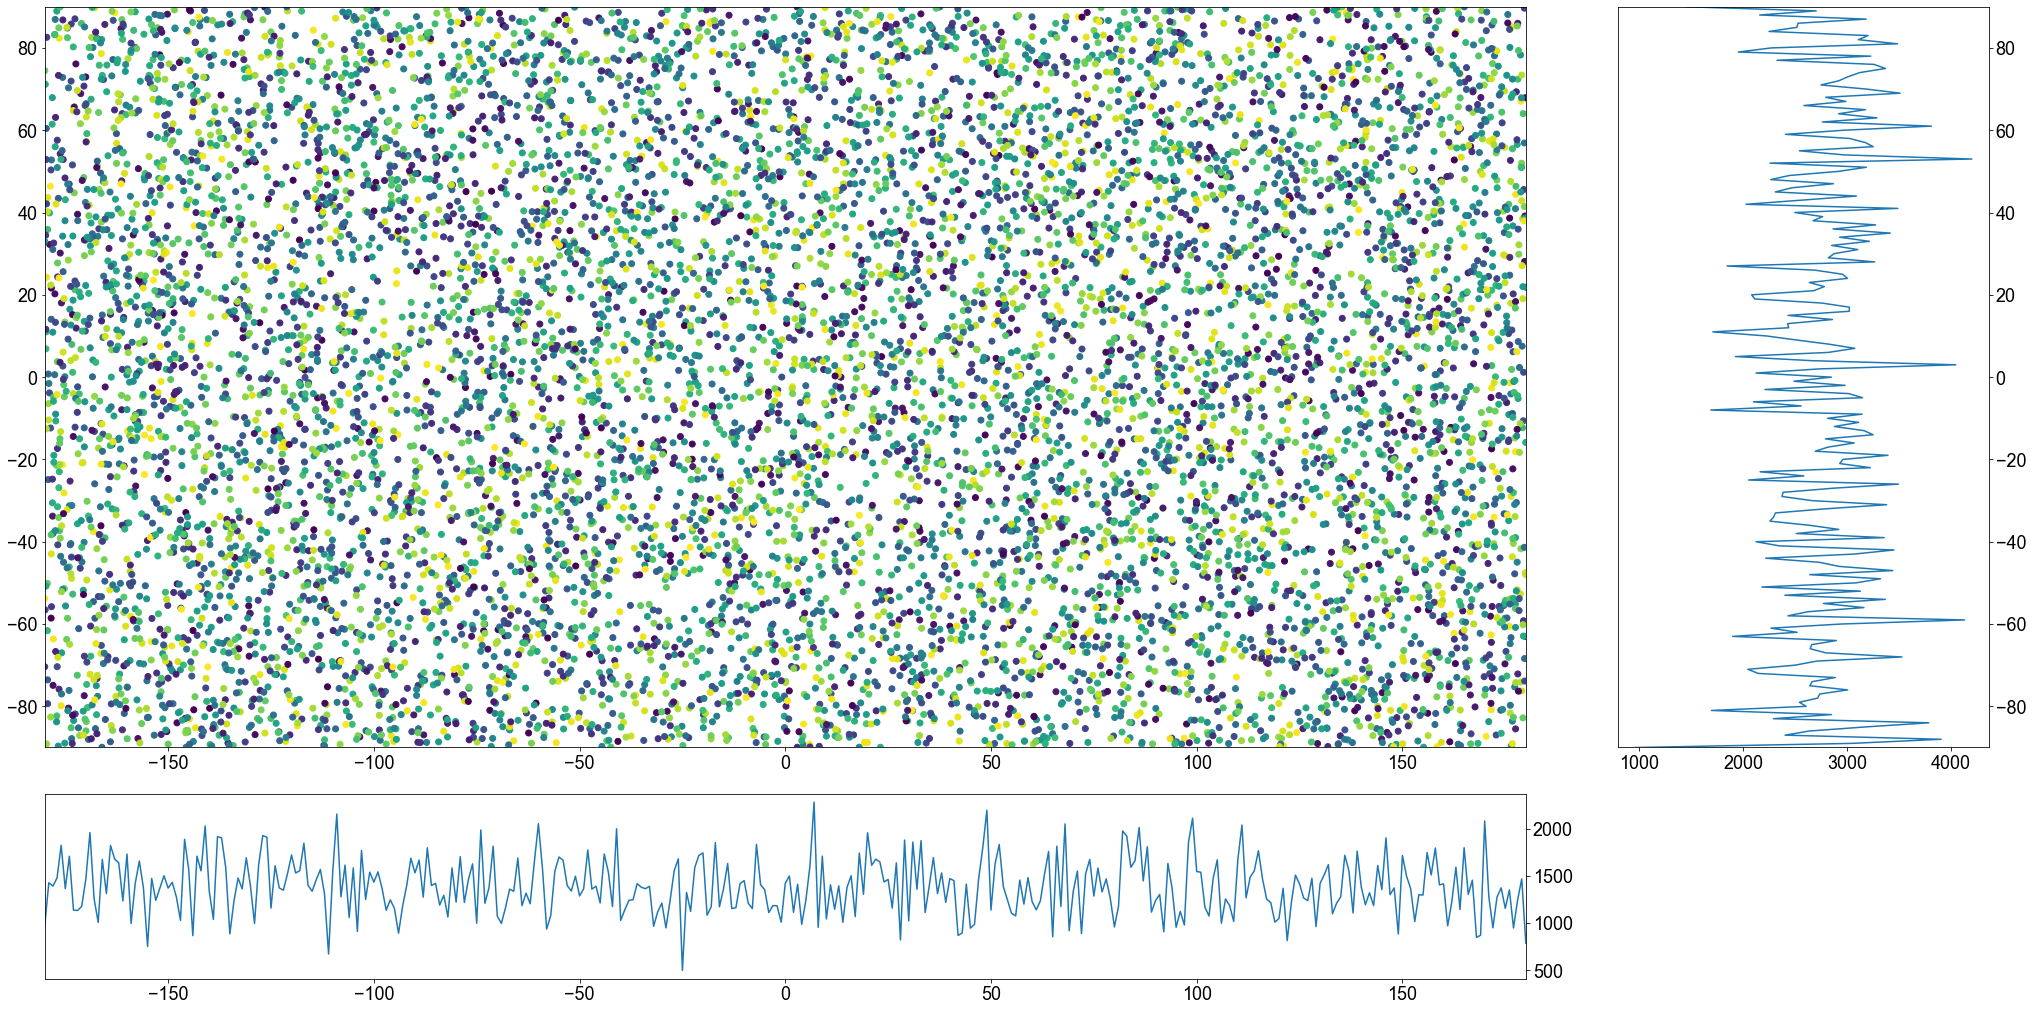

In [53]:
# plot
fig, ax = plt.subplots( figsize=(30, 15))
fig.tight_layout()
# Arial font
plt.rcParams['font.sans-serif']=['Arial']
# font size
plt.rcParams['font.size']=18
plt.subplots_adjust(wspace=0.1,hspace=0.1,left=0.05,right=0.95,top=0.95,bottom=0.05)
# calculate the  extent of the data
xmin, ymin, xmax, ymax = gdf.total_bounds
spec = fig.add_gridspec(2,2,width_ratios=[16,4],height_ratios=[16,4])
ax.axis('off')
ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[1,0])
ax4 = fig.add_subplot(spec[1,1])
ax4.axis('off')
# plot geospatial data in ax1
gdf.plot(column='value', ax=ax1, legend=False)
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
# plot lat accumulation in ax2
gdf_grouped_lat.plot(x='value', y='lat', kind='line', ax=ax2,legend=False)
ax2.set_ylim(ymin, ymax)
ax2.yaxis.tick_right()
ax2.set_xlabel('')
# plot lon accumulation in ax3
gdf_grouped_lon.plot(x='lon', y='value', kind='line', ax=ax3,legend=False)
ax3.set_xlim(xmin, xmax)
ax3.yaxis.tick_right()
ax3.set_xlabel('')
plt.show()